In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv("C:/Users/charl/Downloads/abalone/abalone.csv")

In [3]:
data.head

<bound method NDFrame.head of       M  0.455  0.365  0.095   0.514  0.2245   0.101    0.15  15
0     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
1     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
2     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
3     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
4     I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.1200   8
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4171  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4172  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4173  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4174  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4175  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4176 rows x 9 columns]>

In [4]:
data.shape

(4176, 9)

In [5]:

data.columns

Index(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'],
      dtype='object')

In [6]:
df = pd.DataFrame(data)
# column 명 변경
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# 변경된 데이터셋 출력
print(df)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.350     0.265   0.090        0.2255          0.0995   
1      F   0.530     0.420   0.135        0.6770          0.2565   
2      M   0.440     0.365   0.125        0.5160          0.2155   
3      I   0.330     0.255   0.080        0.2050          0.0895   
4      I   0.425     0.300   0.095        0.3515          0.1410   
...   ..     ...       ...     ...           ...             ...   
4171   F   0.565     0.450   0.165        0.8870          0.3700   
4172   M   0.590     0.440   0.135        0.9660          0.4390   
4173   M   0.600     0.475   0.205        1.1760          0.5255   
4174   F   0.625     0.485   0.150        1.0945          0.5310   
4175   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.0485        0.0700      7  
1             0.1415        0.2100      9  
2             0.1140        0.1550     10  
3      

In [7]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [8]:
df.head

<bound method NDFrame.head of       Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.350     0.265   0.090        0.2255          0.0995   
1       0   0.530     0.420   0.135        0.6770          0.2565   
2       2   0.440     0.365   0.125        0.5160          0.2155   
3       1   0.330     0.255   0.080        0.2050          0.0895   
4       1   0.425     0.300   0.095        0.3515          0.1410   
...   ...     ...       ...     ...           ...             ...   
4171    0   0.565     0.450   0.165        0.8870          0.3700   
4172    2   0.590     0.440   0.135        0.9660          0.4390   
4173    2   0.600     0.475   0.205        1.1760          0.5255   
4174    0   0.625     0.485   0.150        1.0945          0.5310   
4175    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.0485        0.0700      7  
1             0.1415        0.2100      9  
2        

In [9]:
df1 = pd.DataFrame(df)

In [10]:
# 결측치 확인
missing_values = df1.isnull().sum()

# 결측치 출력
print("결측치 확인:\n", missing_values)

결측치 확인:
 Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [11]:
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [12]:
!pip install sweetviz

In [13]:
import sweetviz

                                             |          | [  0%]   00:00 -> (? left)


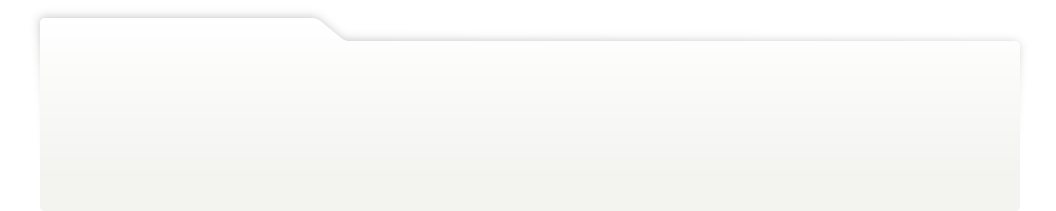
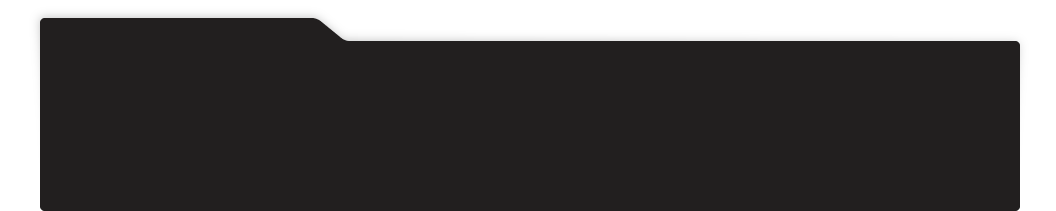
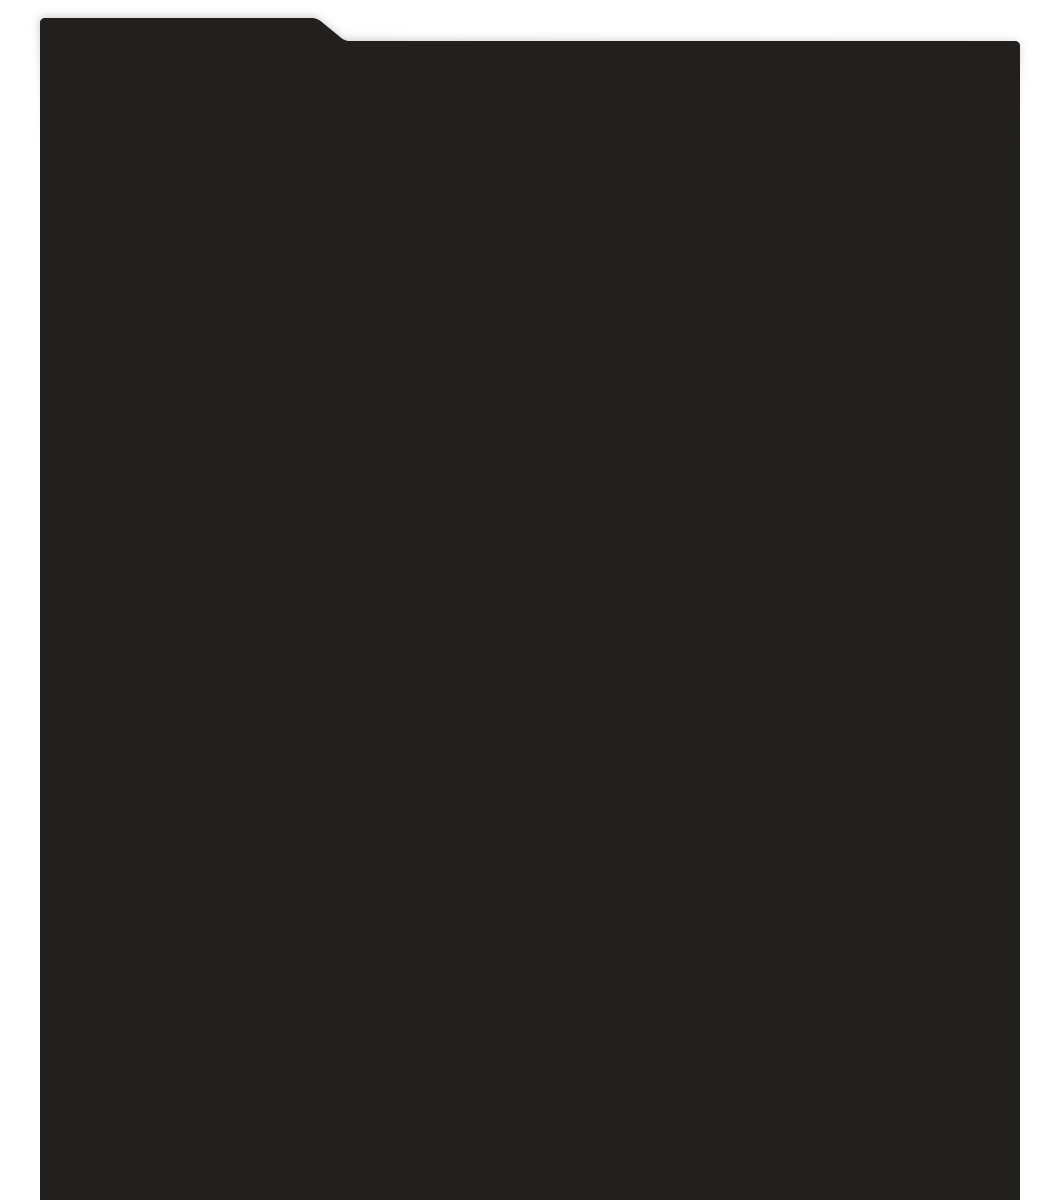
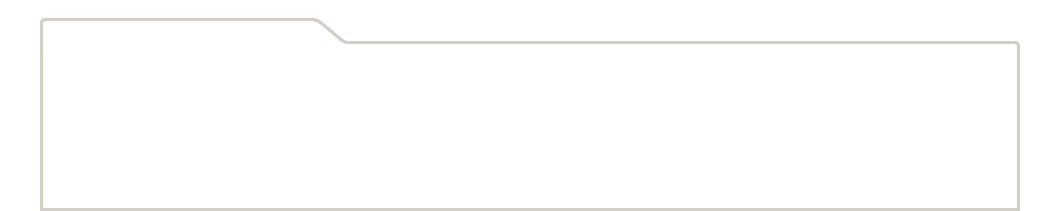
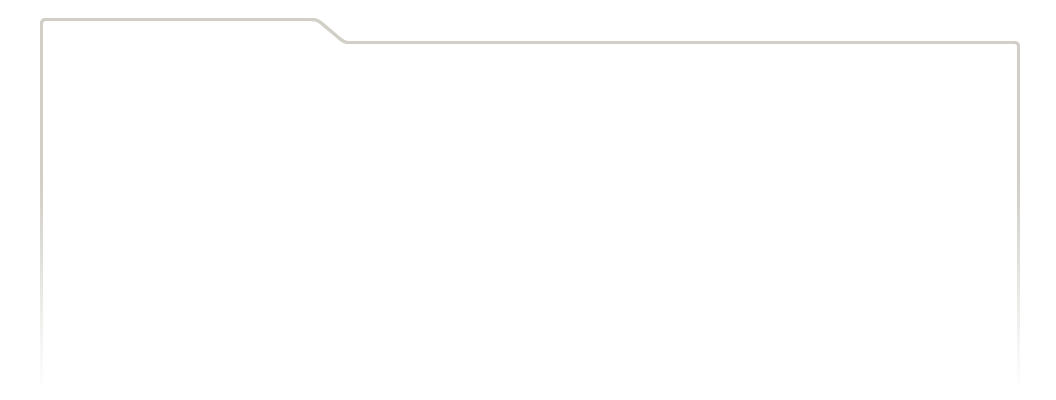
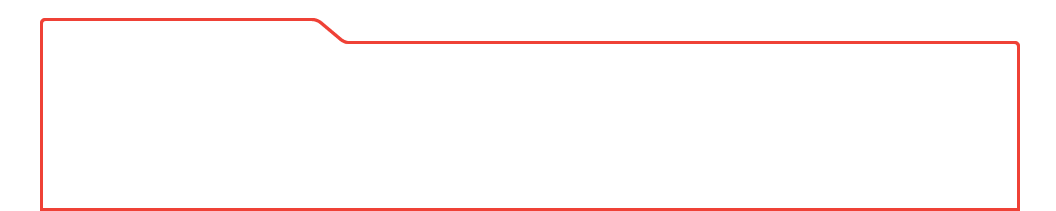
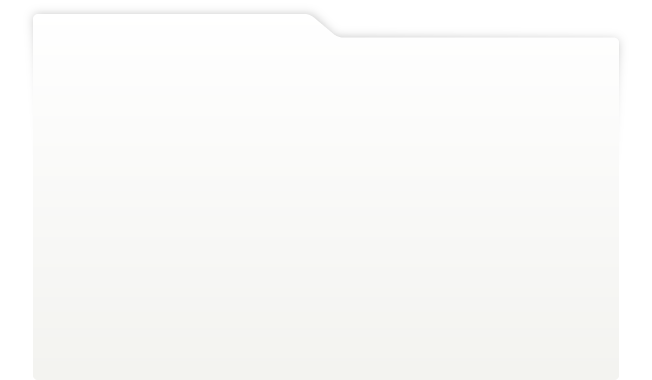
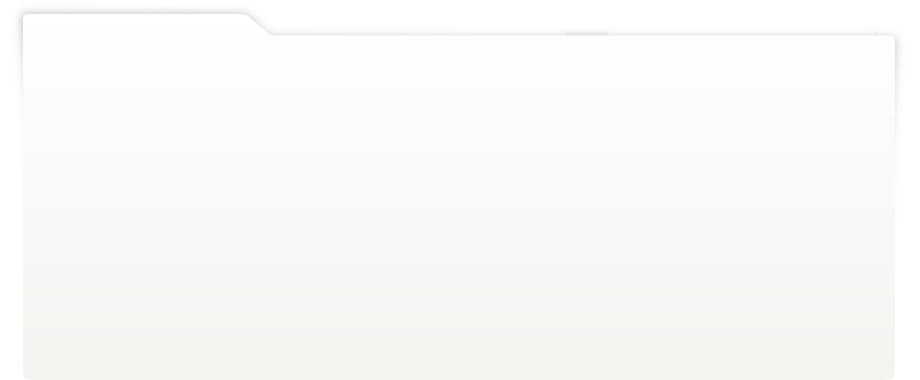
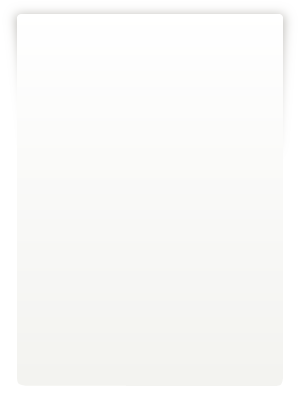
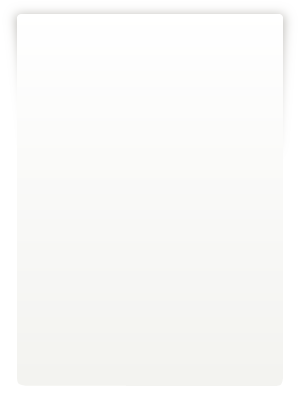
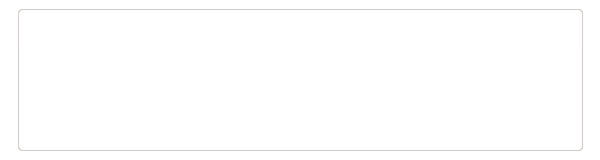
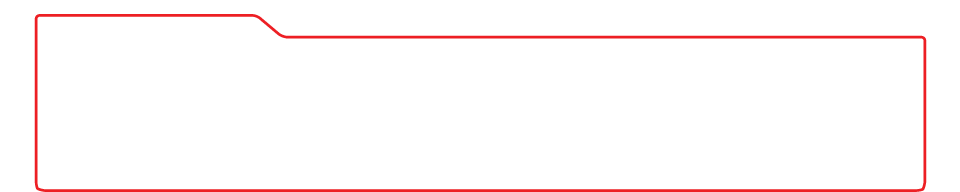
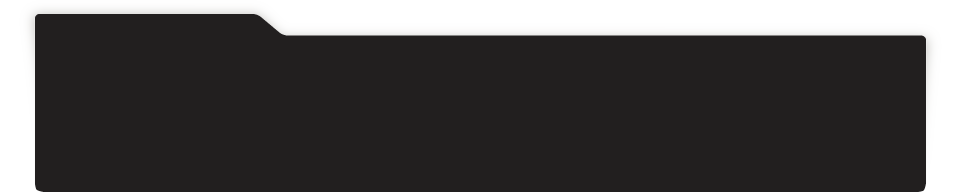
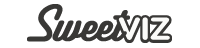
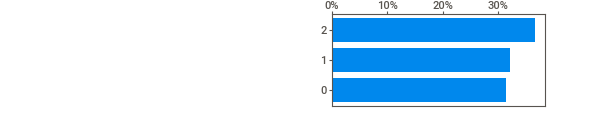
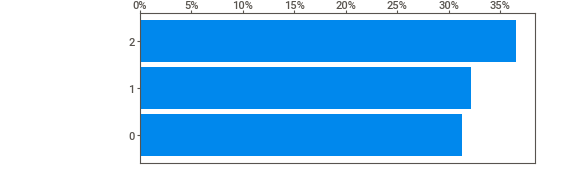
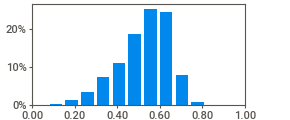
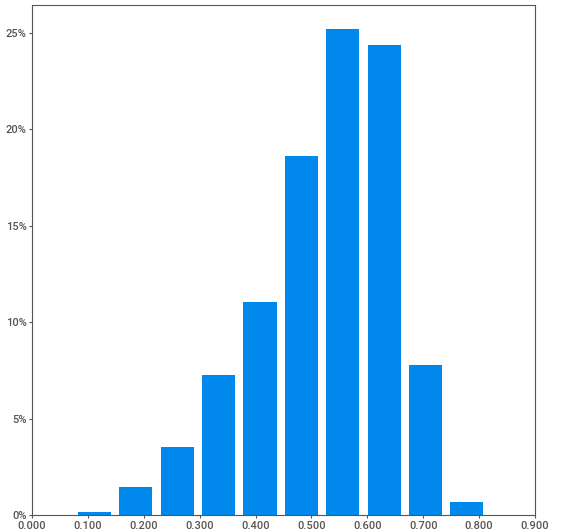
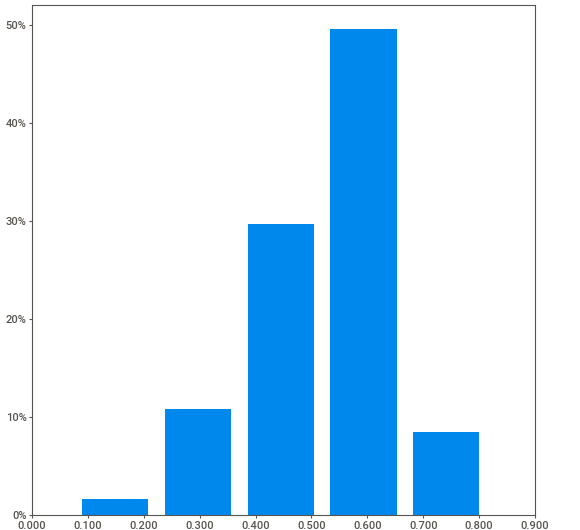
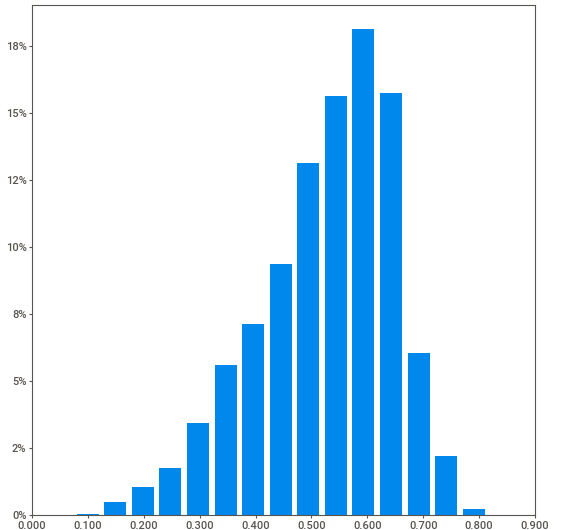
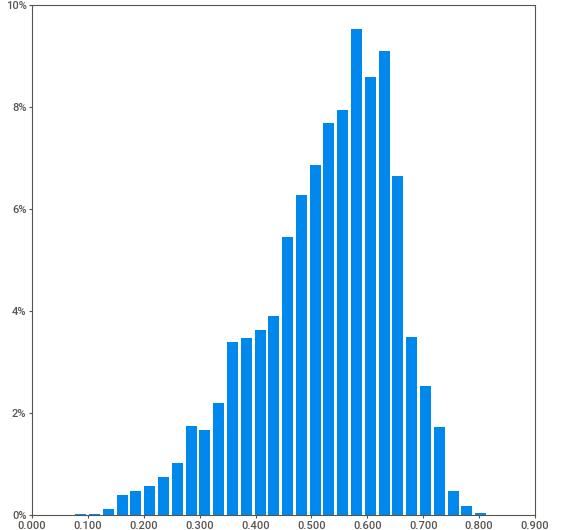
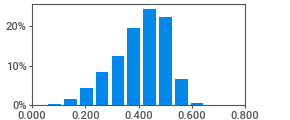
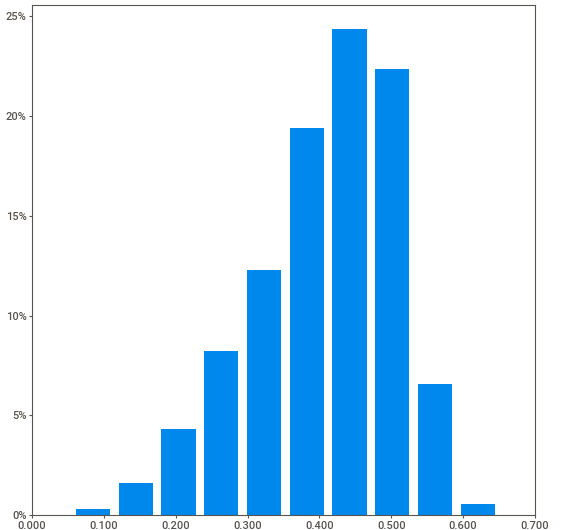
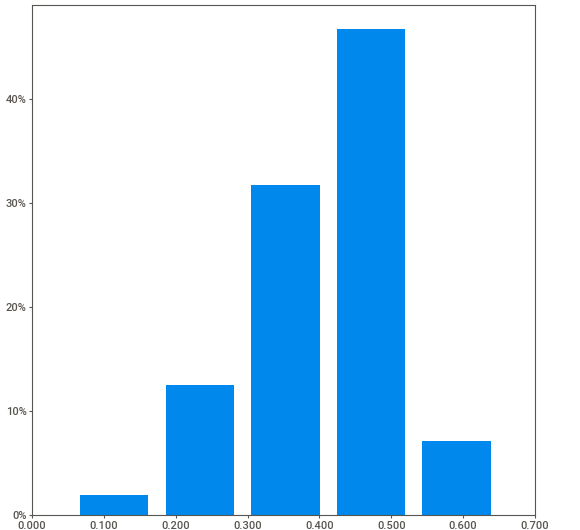
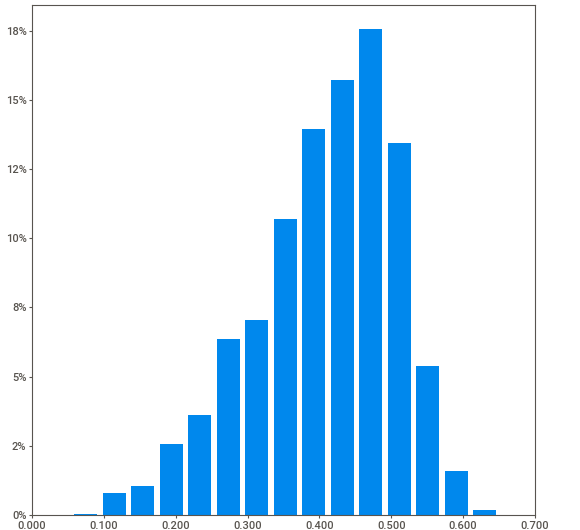
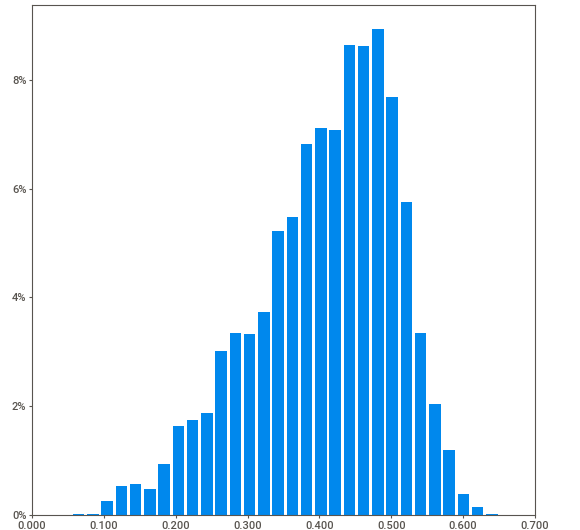
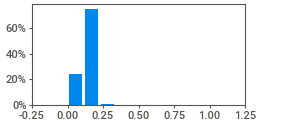
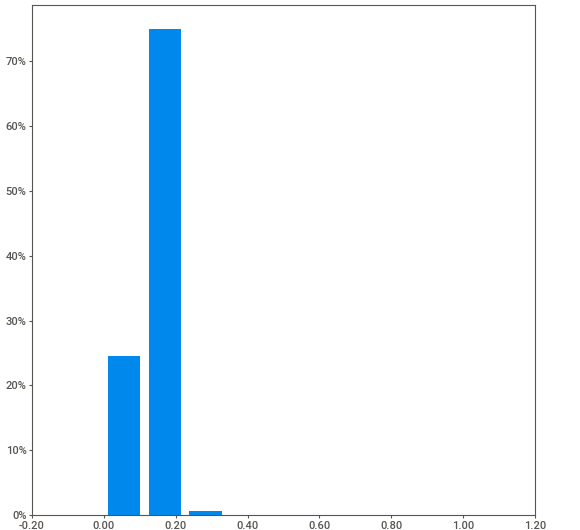
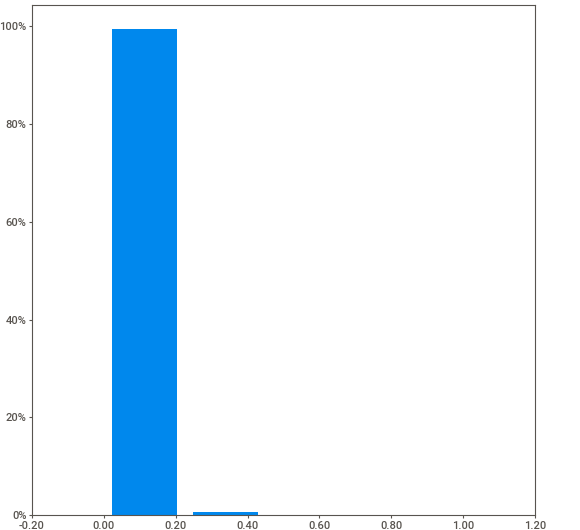
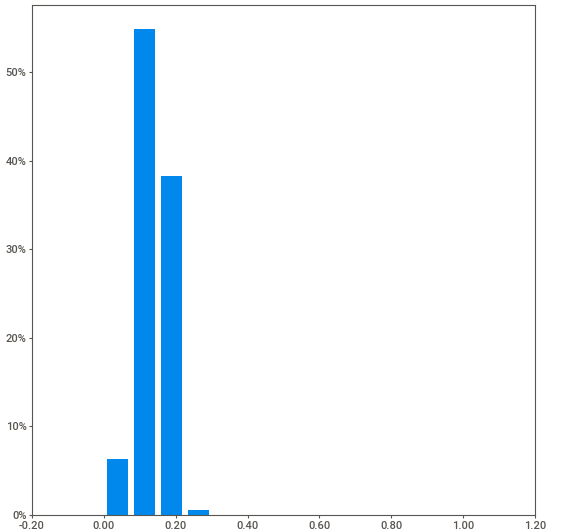
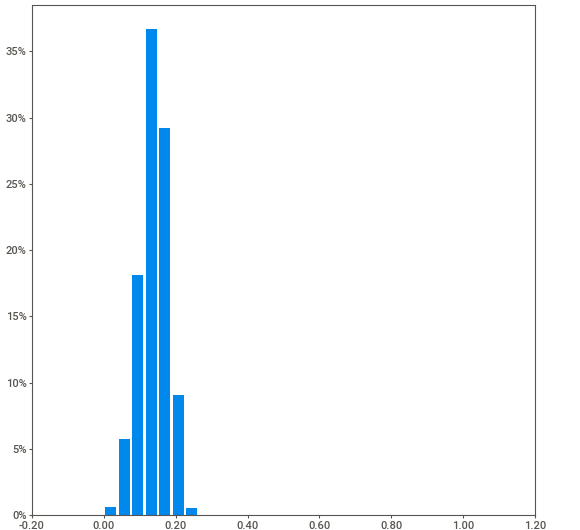
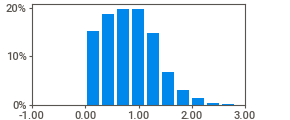
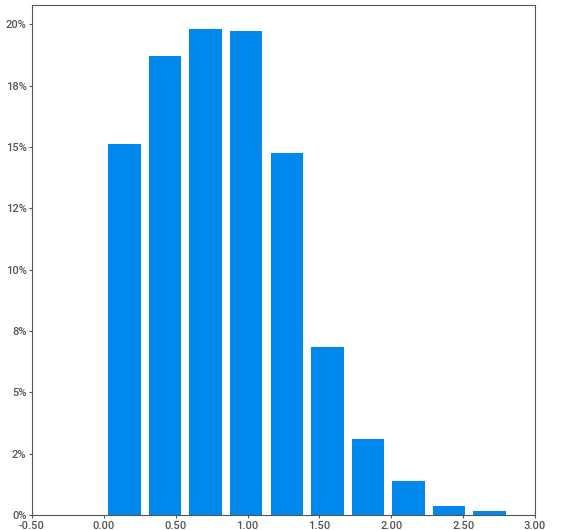
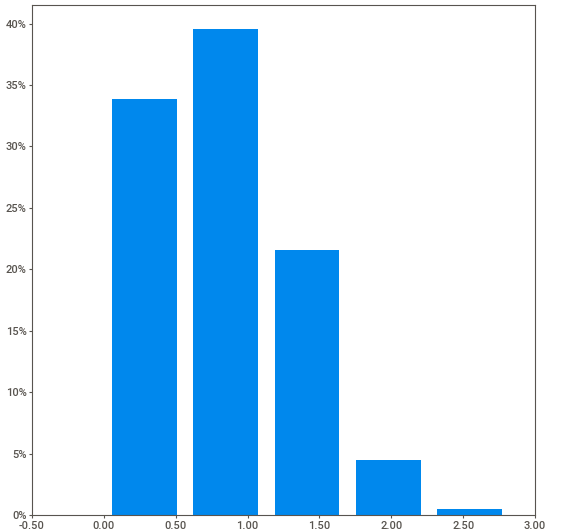
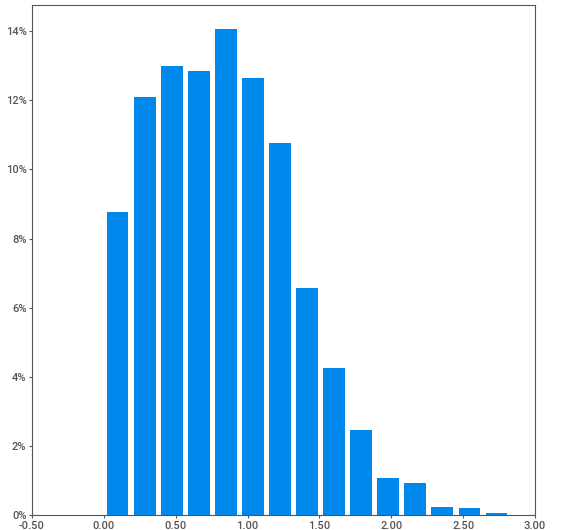
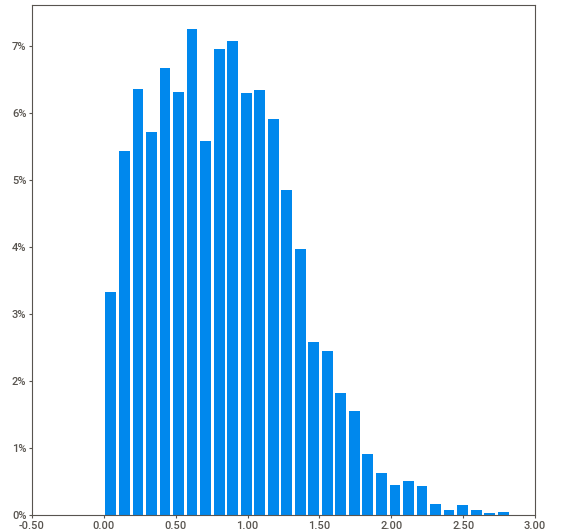
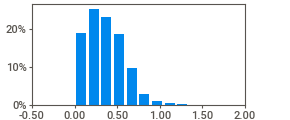
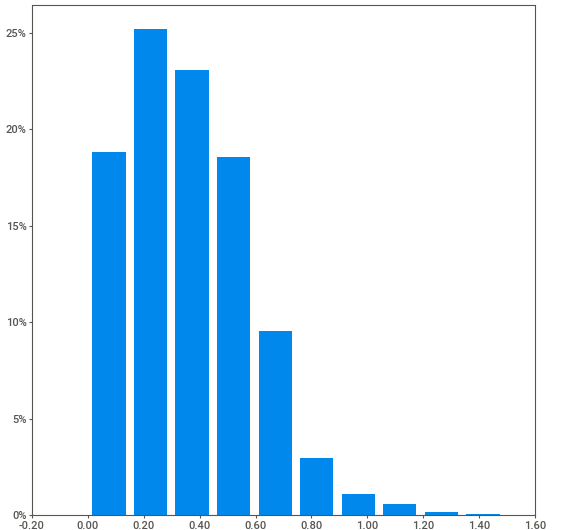
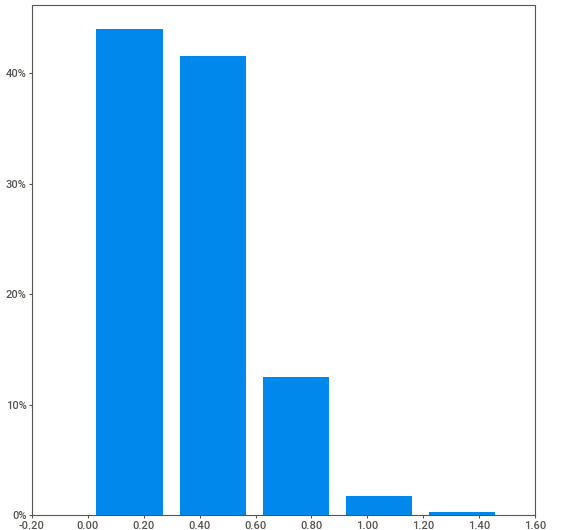
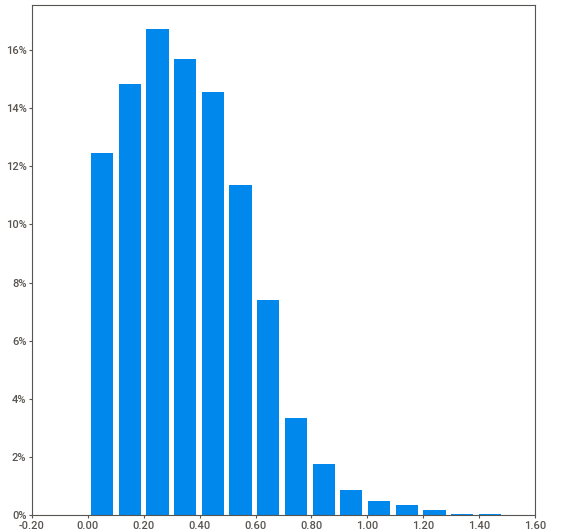
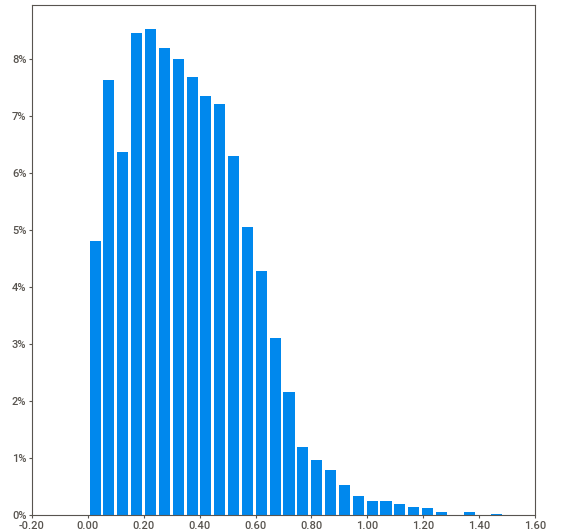
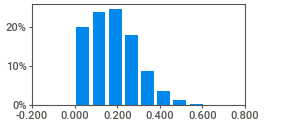
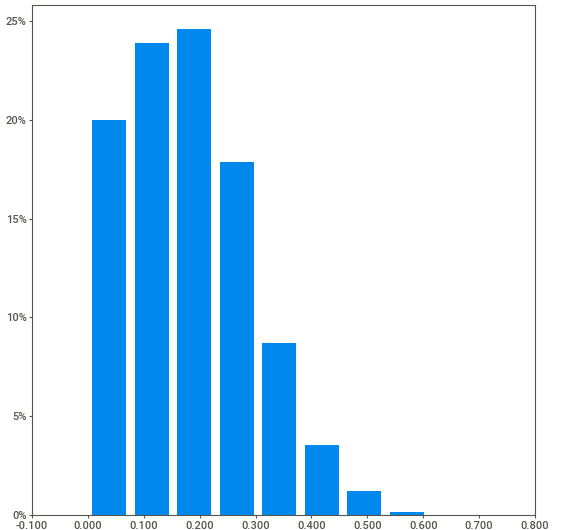
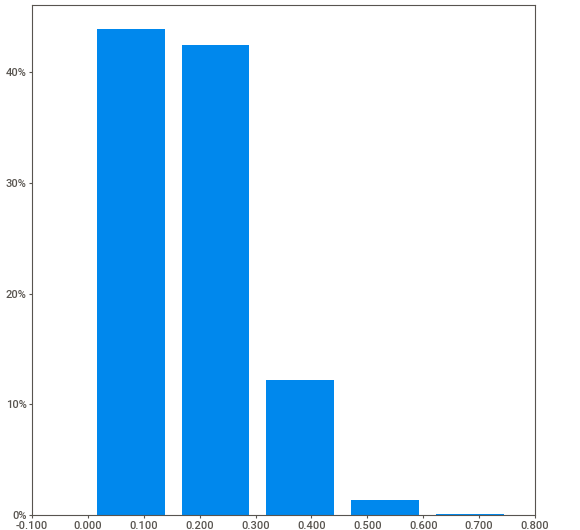
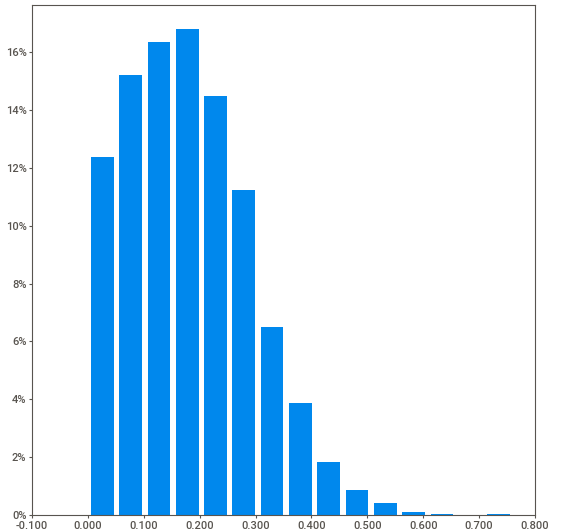
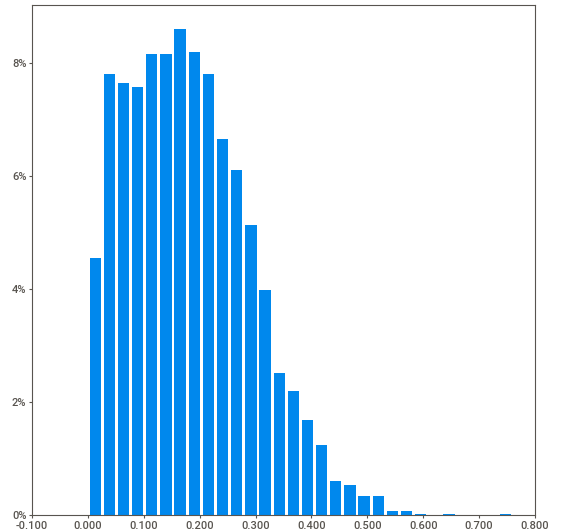
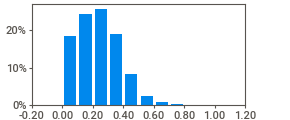
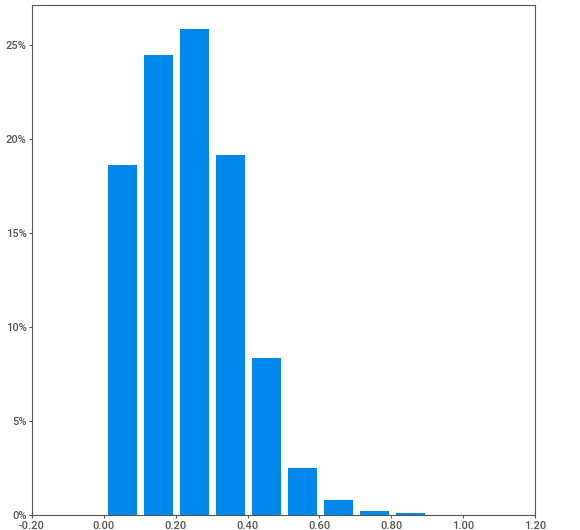
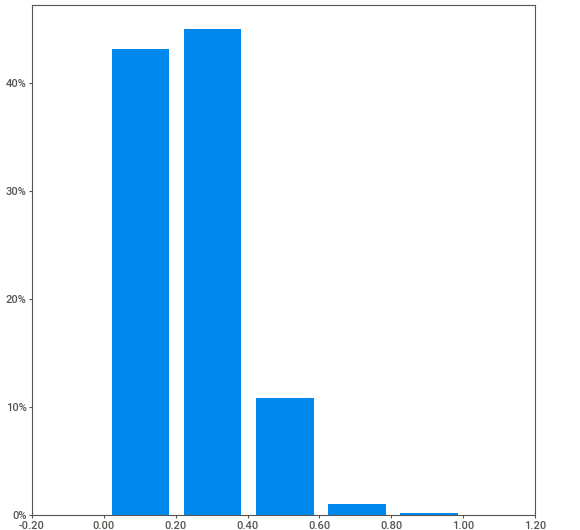
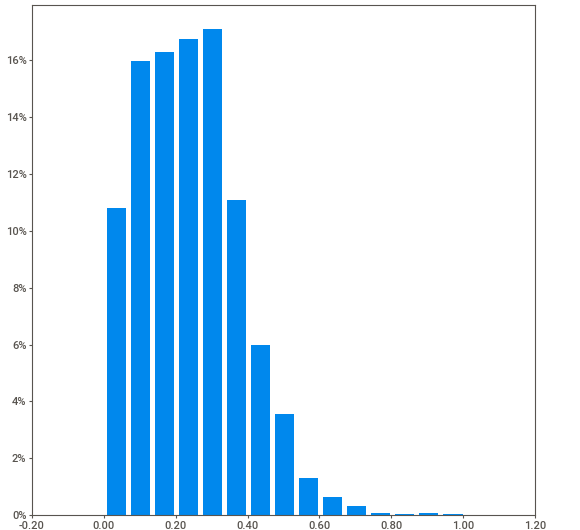
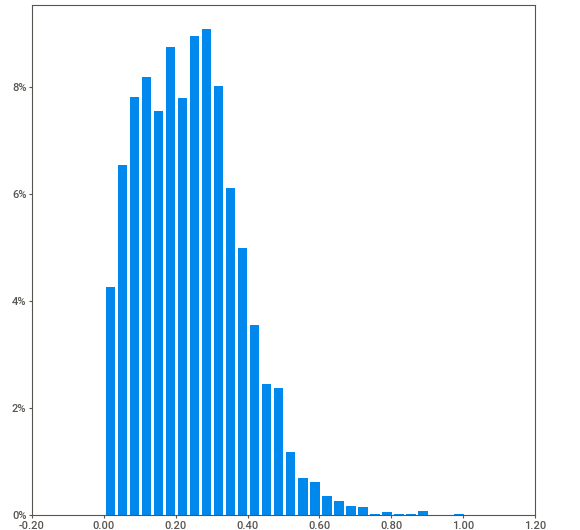
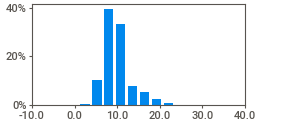
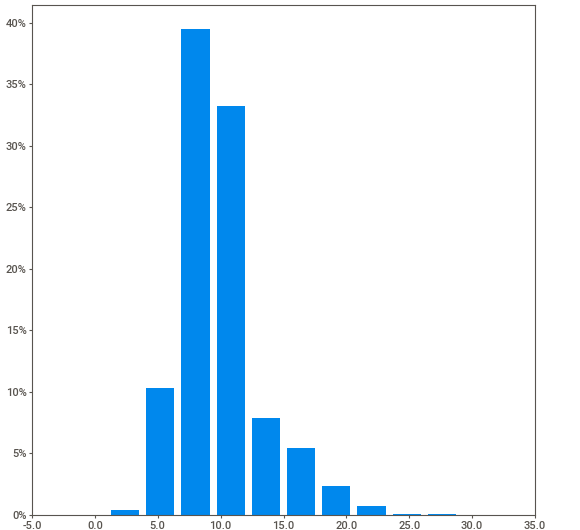
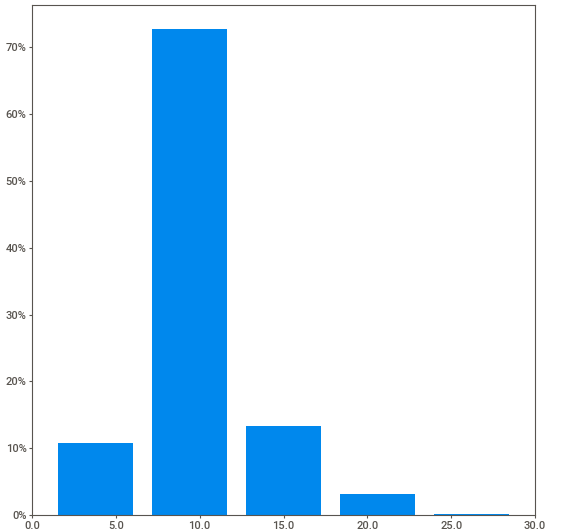
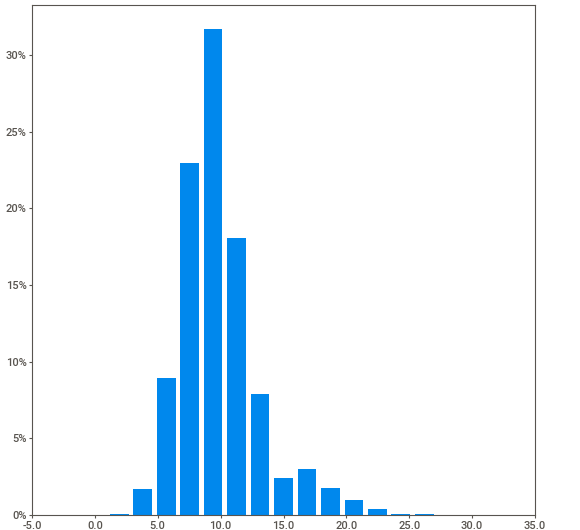
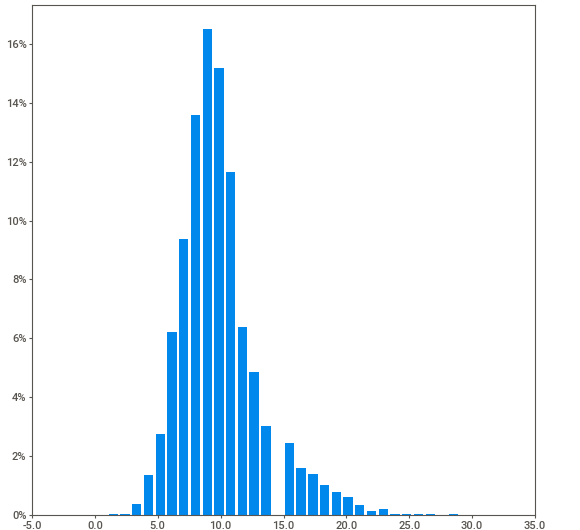
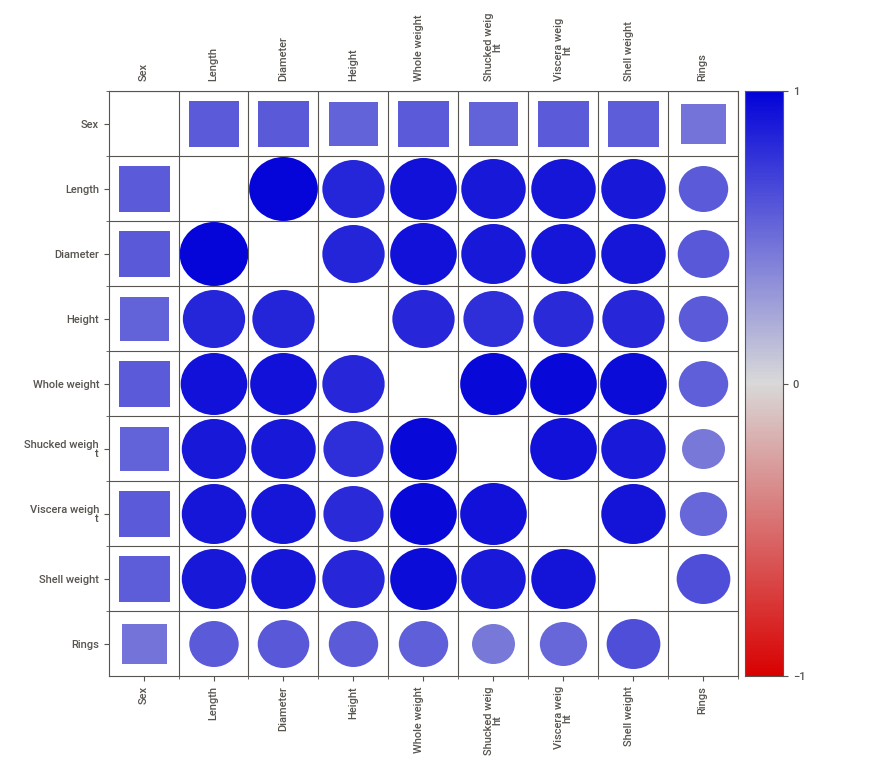
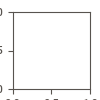

In [14]:
sweetviz.analyze(df1).show_notebook()

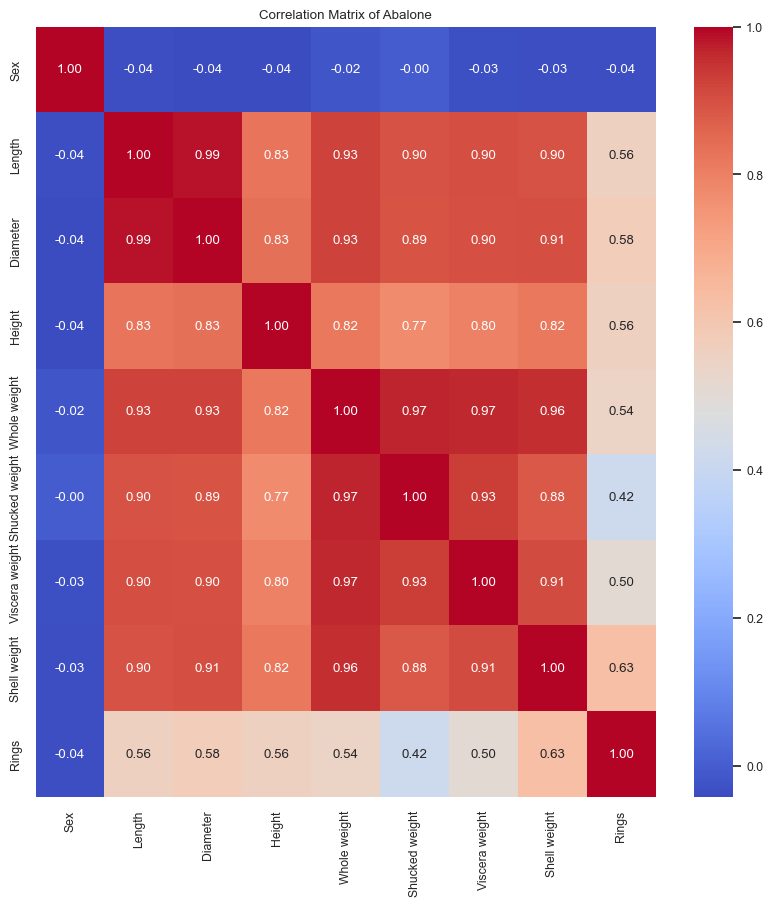

In [15]:
#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')
#sns.heatmap(data_corr, annot=True, cbar=False)
plt.title('Correlation Matrix of Abalone')
plt.show()

In [17]:
df1.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [18]:
df1.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [20]:
# Count the number of instances for each 'Rings' value
ring_counts = df['Rings'].value_counts()

# Filter out rows where the count is greater than 20
filtered_df = df[df['Rings'].isin(ring_counts.index[ring_counts > 20])]

# Print the filtered DataFrame
print(filtered_df)


      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.350     0.265   0.090        0.2255          0.0995   
1       0   0.530     0.420   0.135        0.6770          0.2565   
2       2   0.440     0.365   0.125        0.5160          0.2155   
3       1   0.330     0.255   0.080        0.2050          0.0895   
4       1   0.425     0.300   0.095        0.3515          0.1410   
...   ...     ...       ...     ...           ...             ...   
4171    0   0.565     0.450   0.165        0.8870          0.3700   
4172    2   0.590     0.440   0.135        0.9660          0.4390   
4173    2   0.600     0.475   0.205        1.1760          0.5255   
4174    0   0.625     0.485   0.150        1.0945          0.5310   
4175    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.0485        0.0700      7  
1             0.1415        0.2100      9  
2             0.1140        0.1550     

                                             |          | [  0%]   00:00 -> (? left)


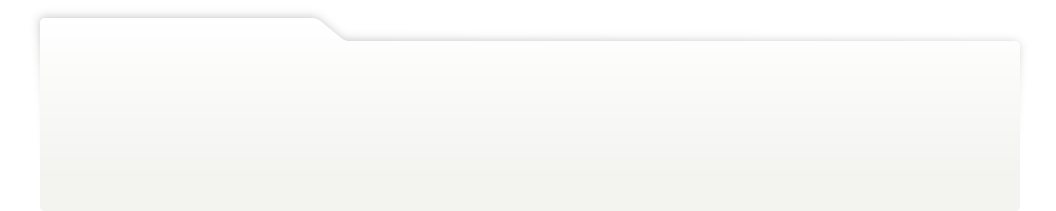
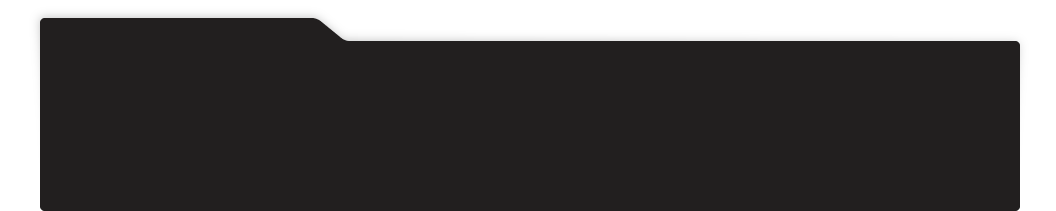
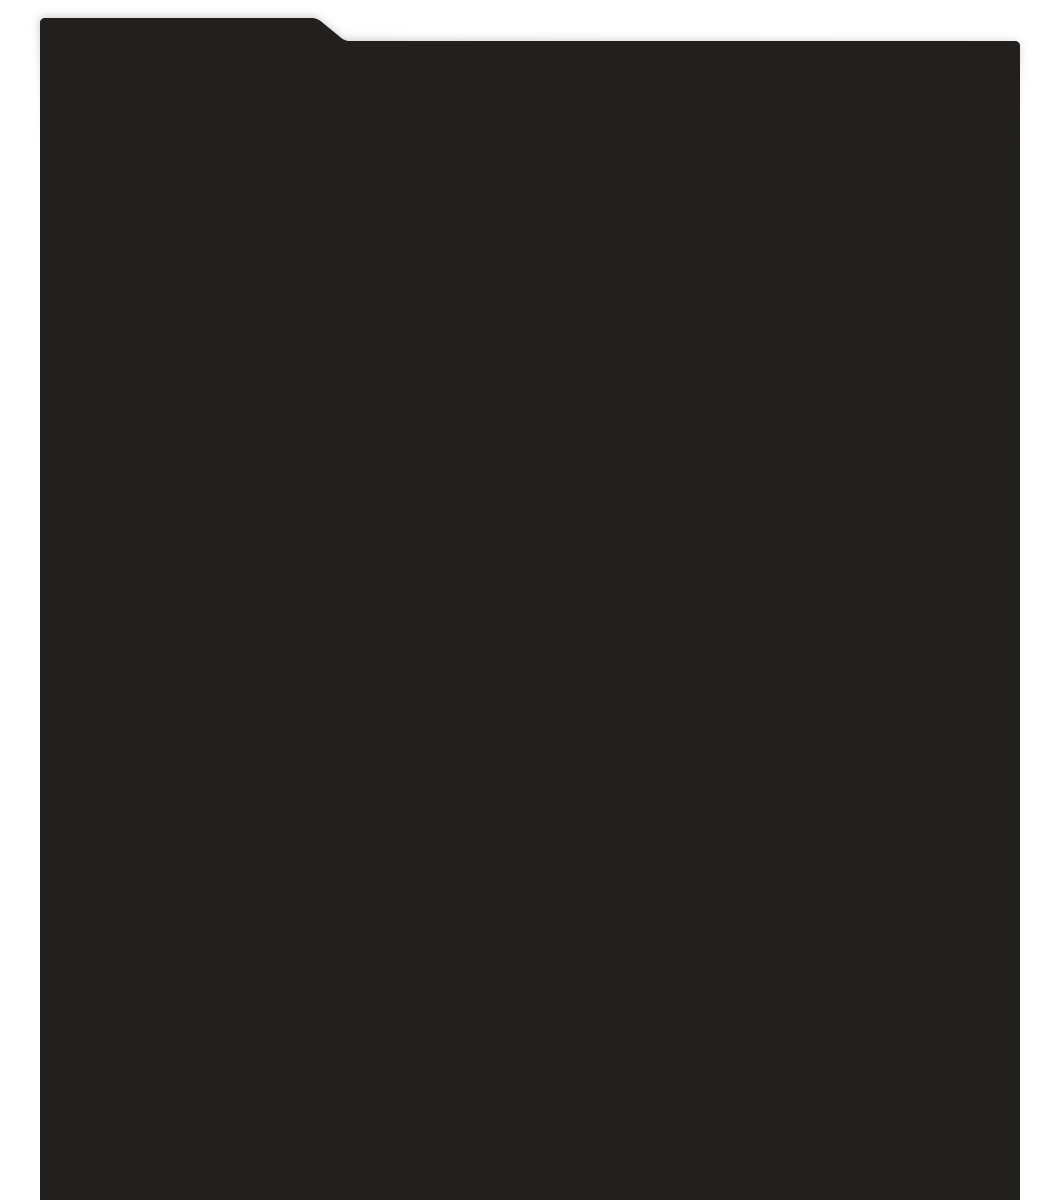
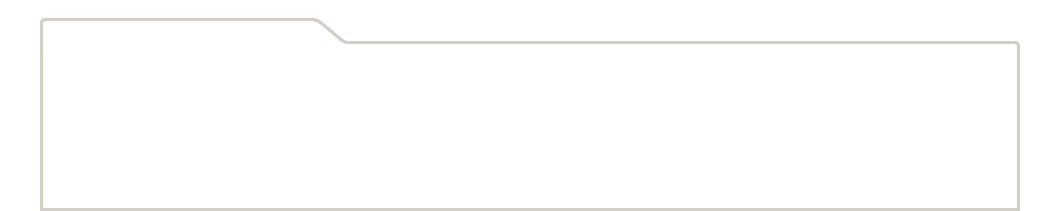
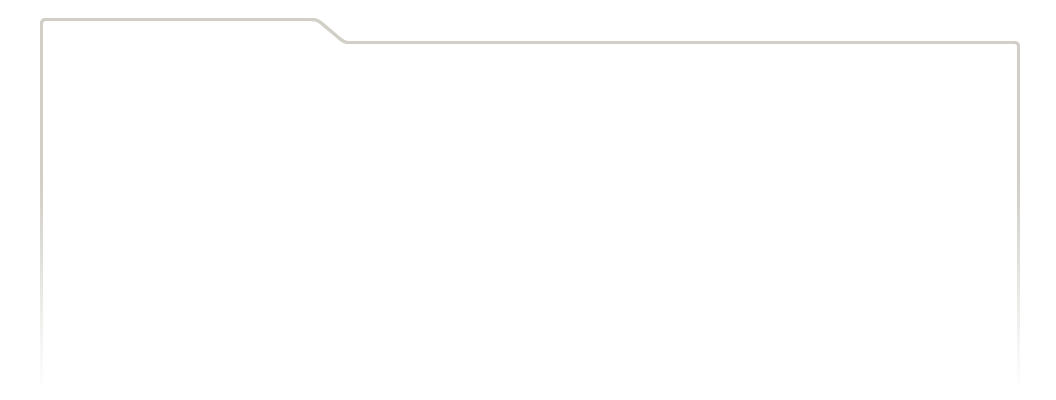
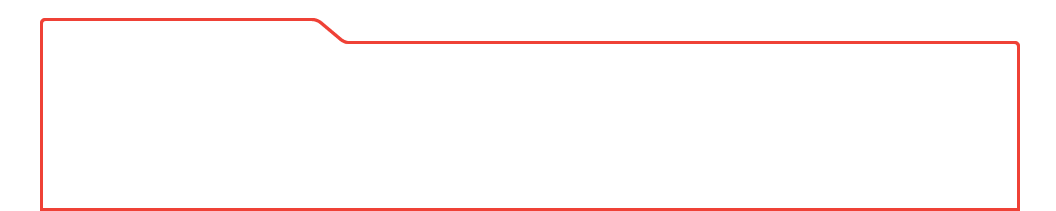
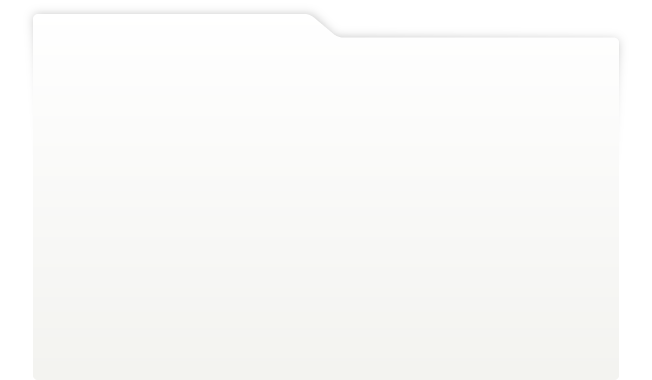
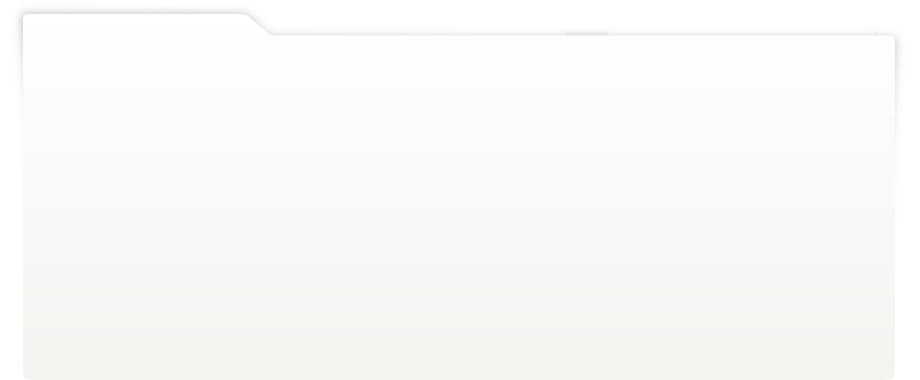
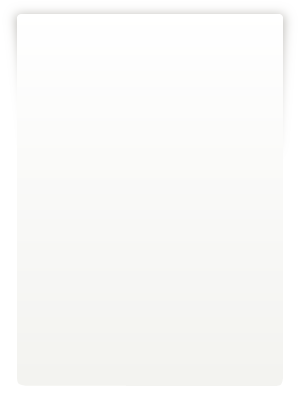
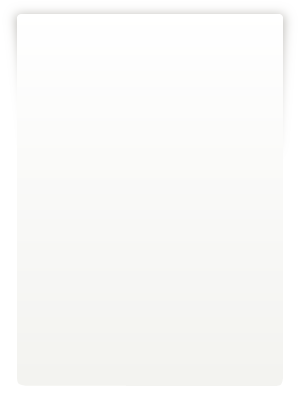
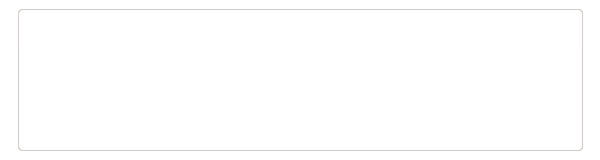
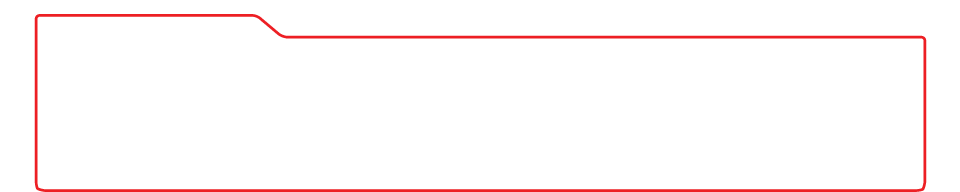
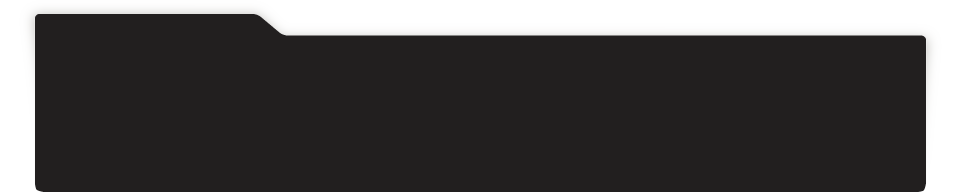
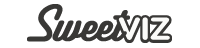
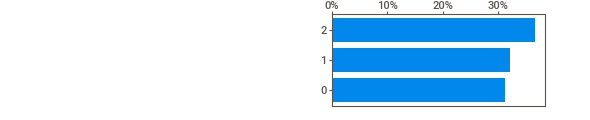
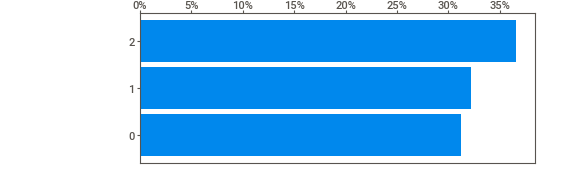
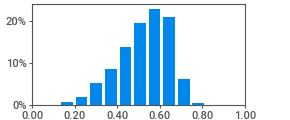
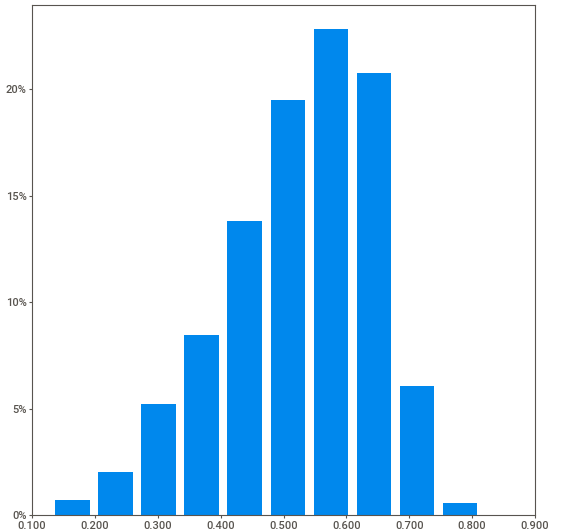
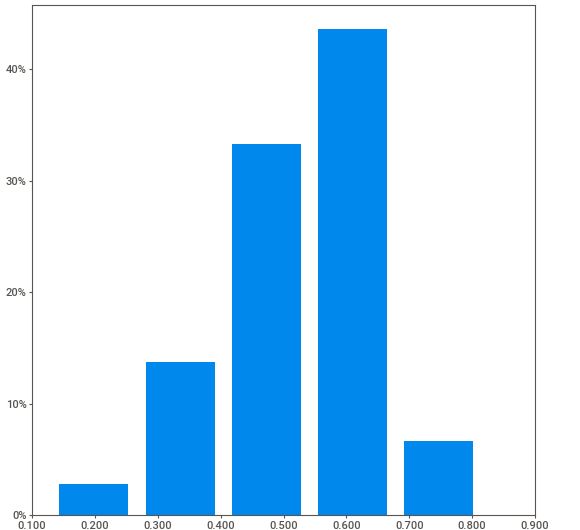
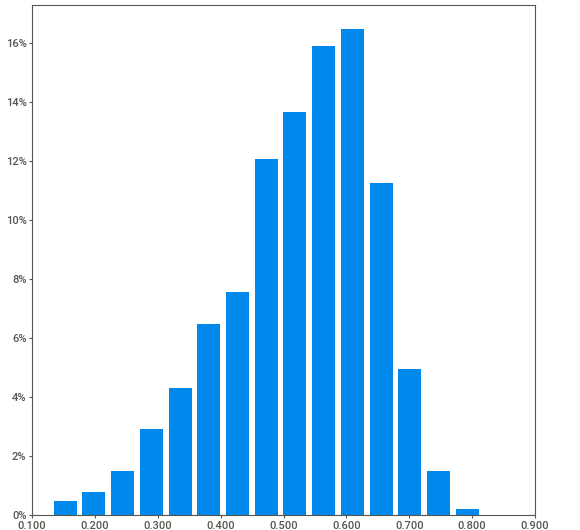
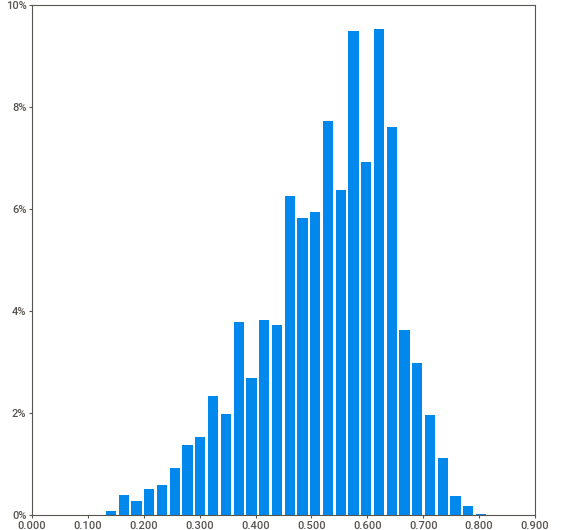
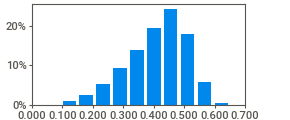
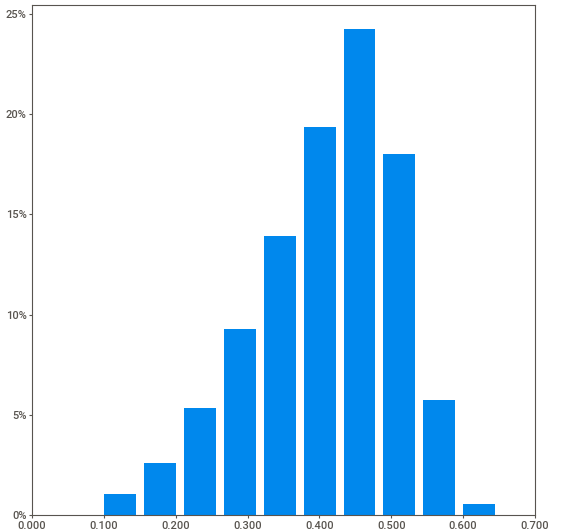
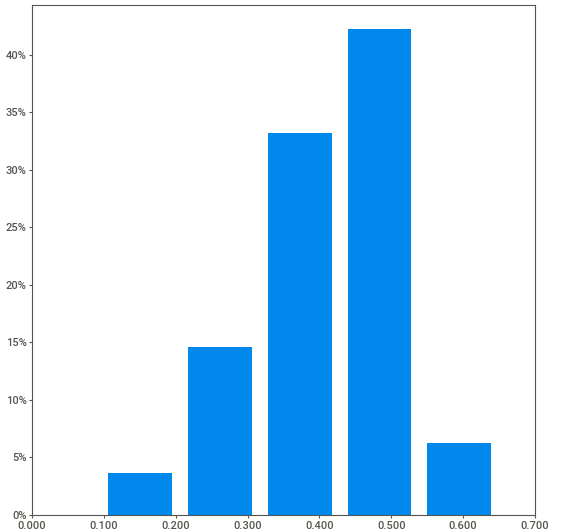
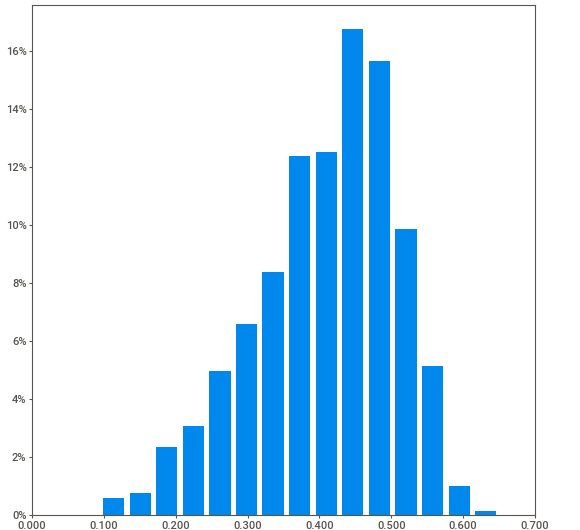
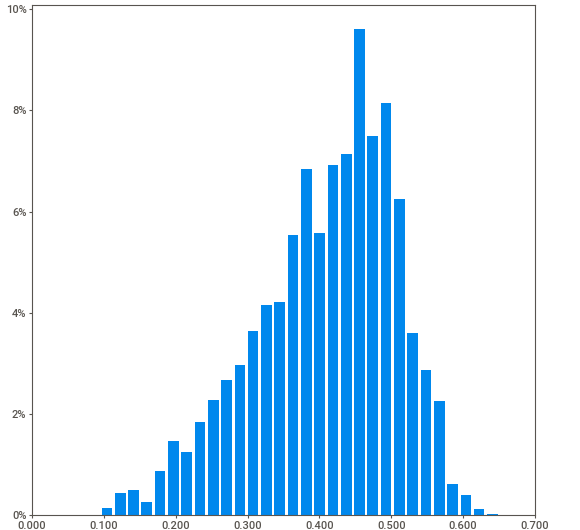
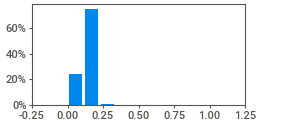
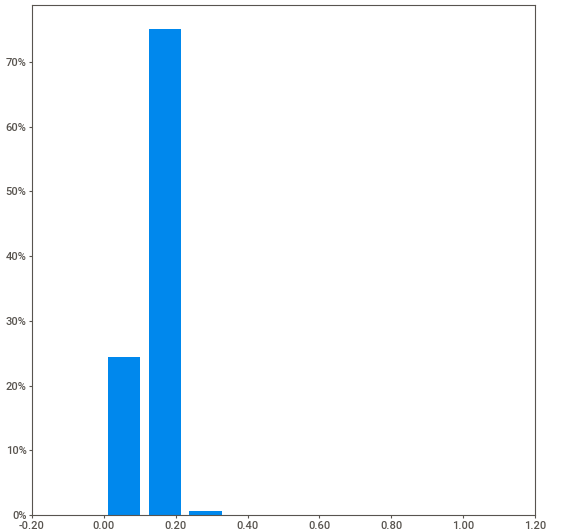
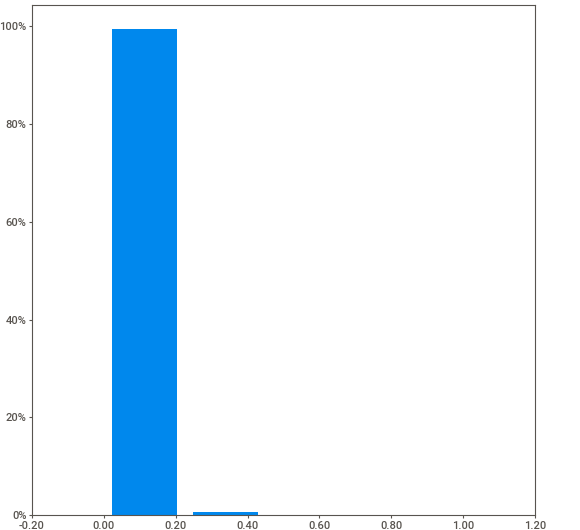
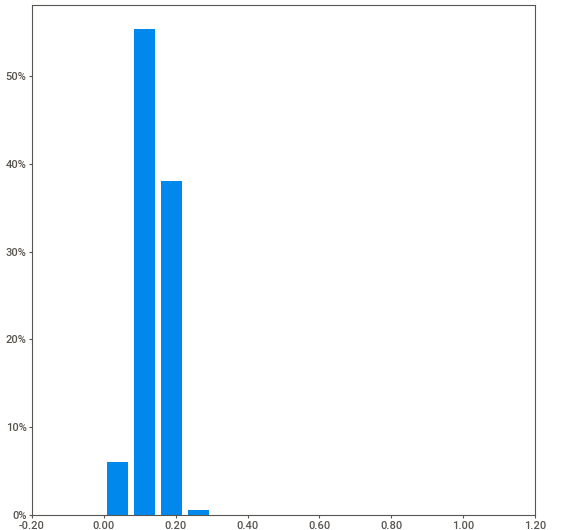
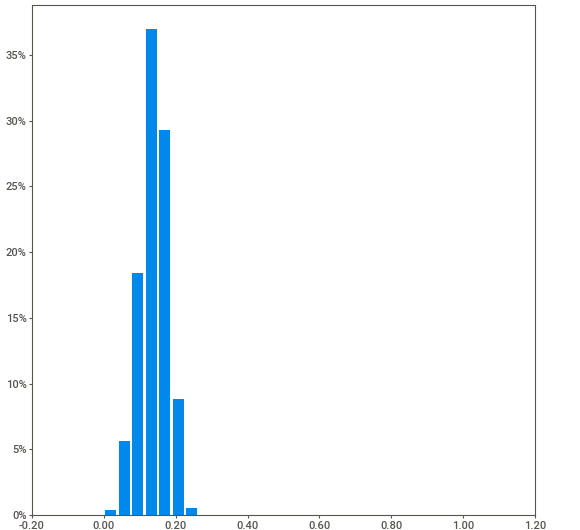
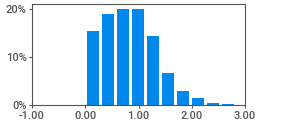
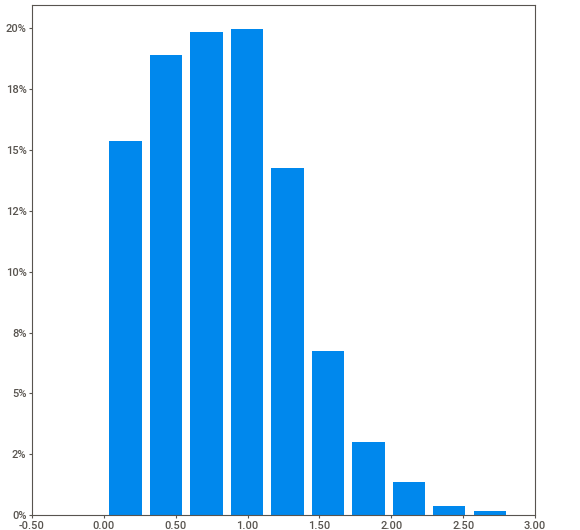
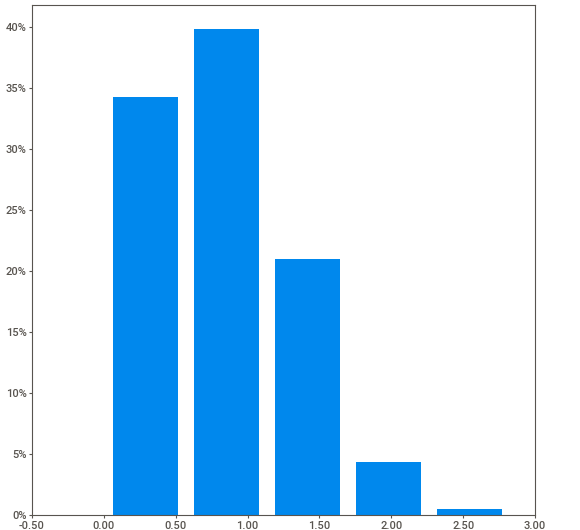
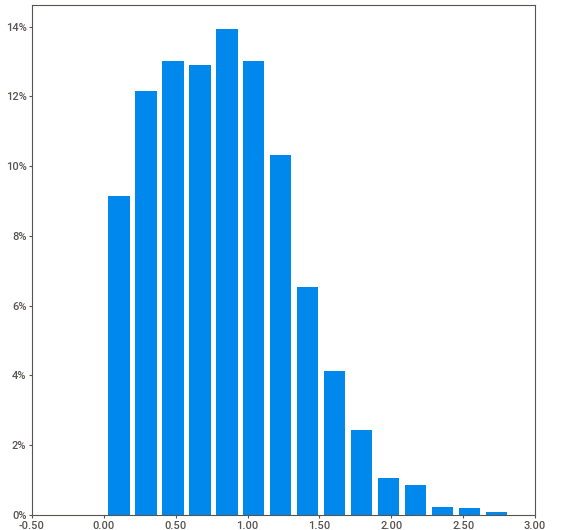
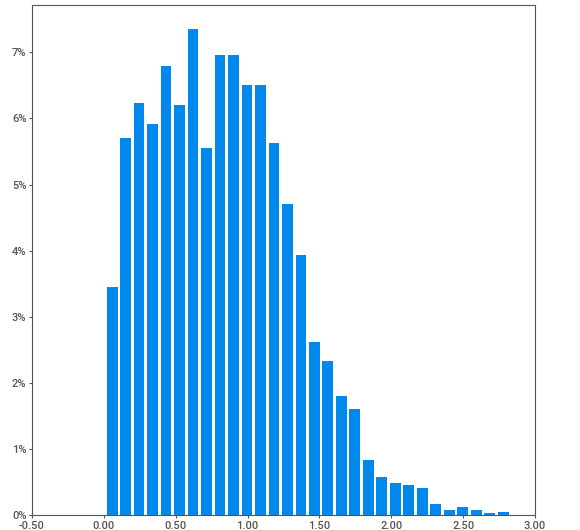
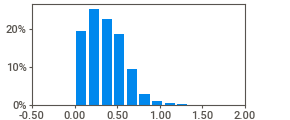
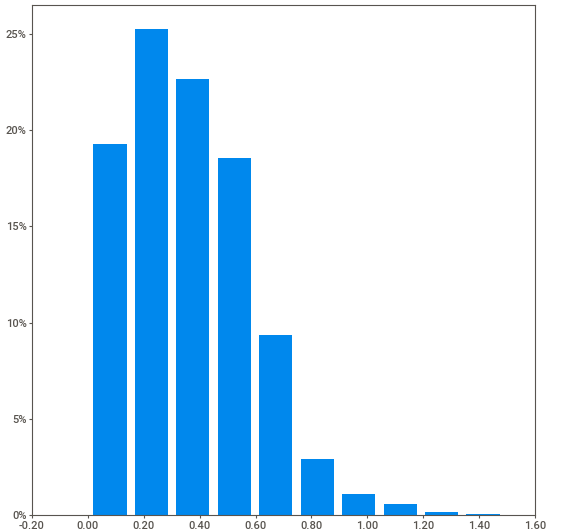
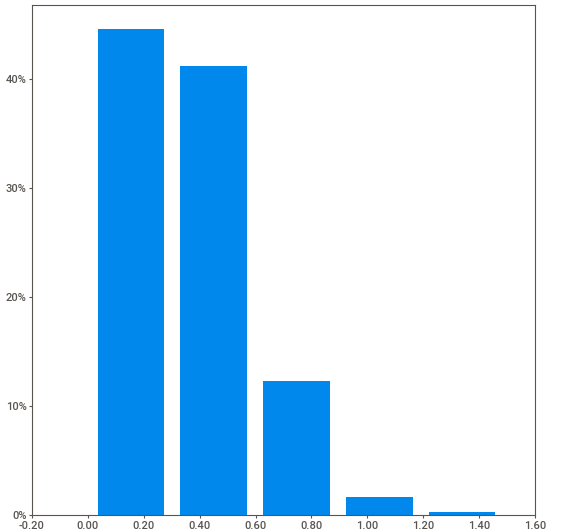
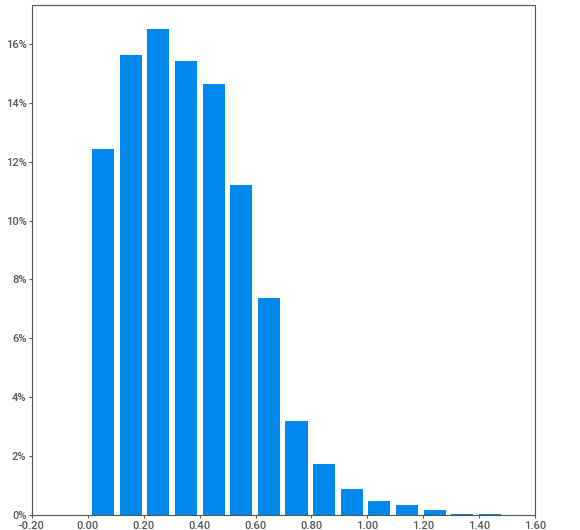
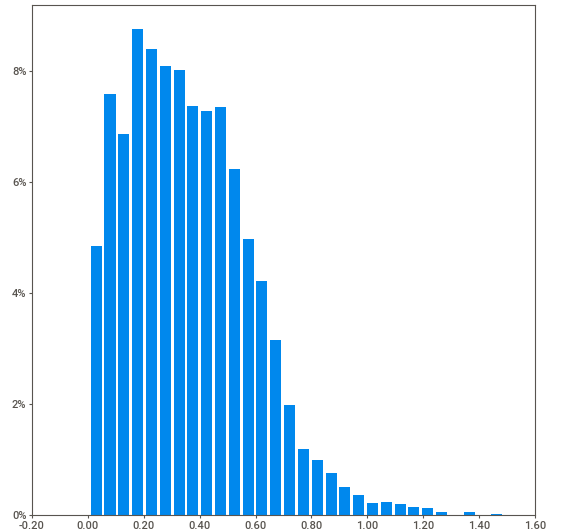
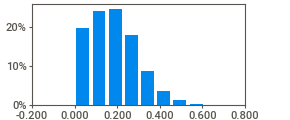
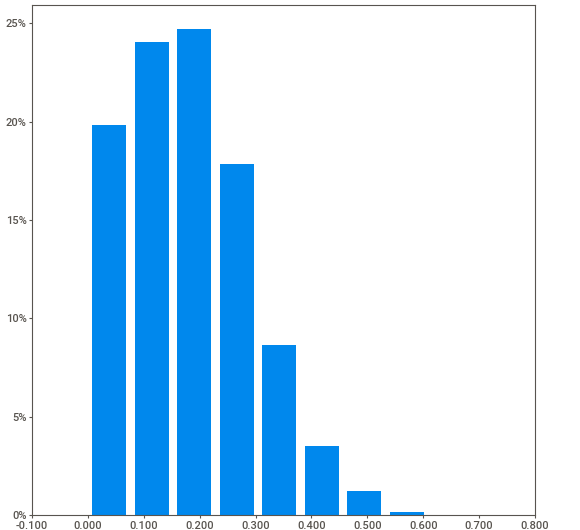
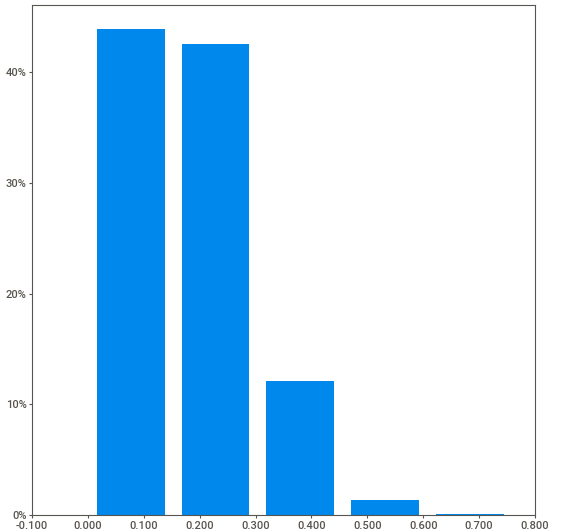
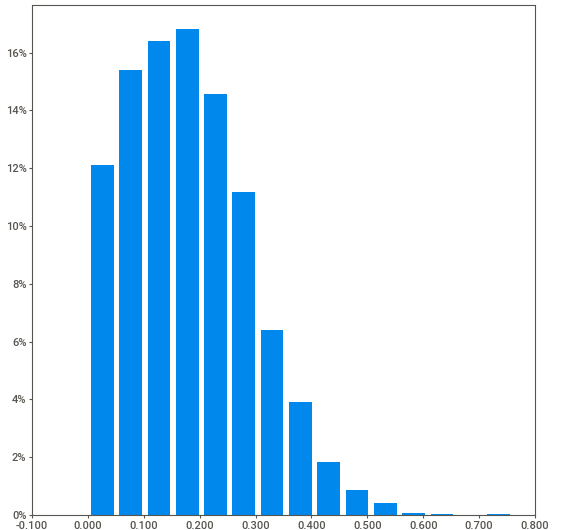
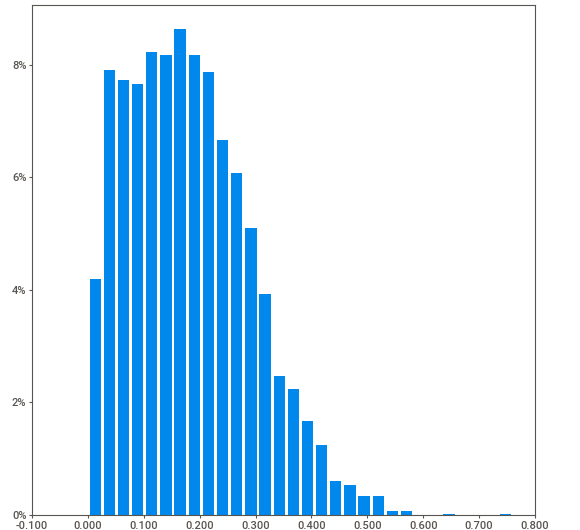
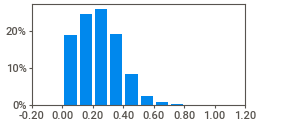
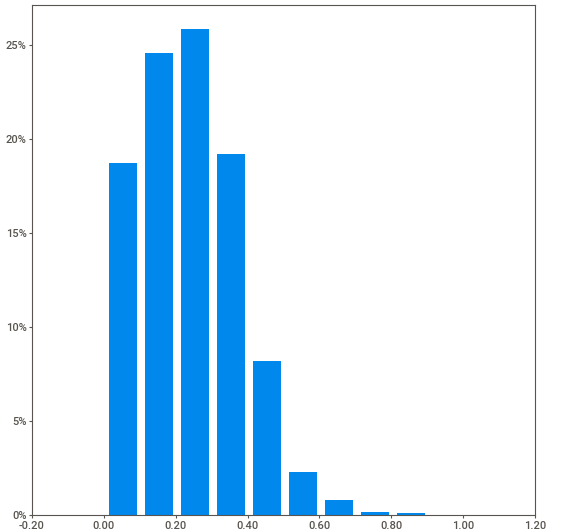
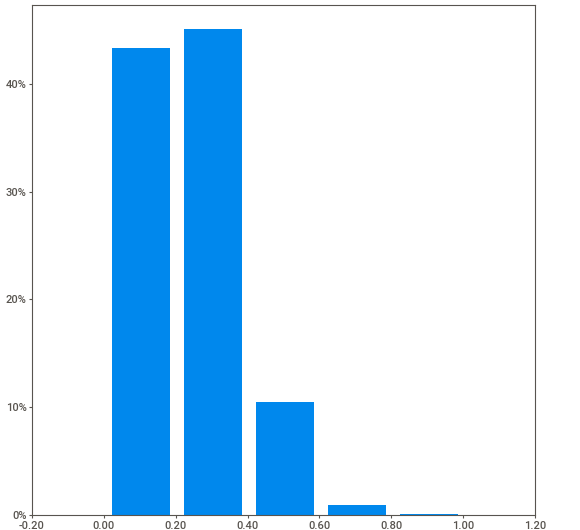
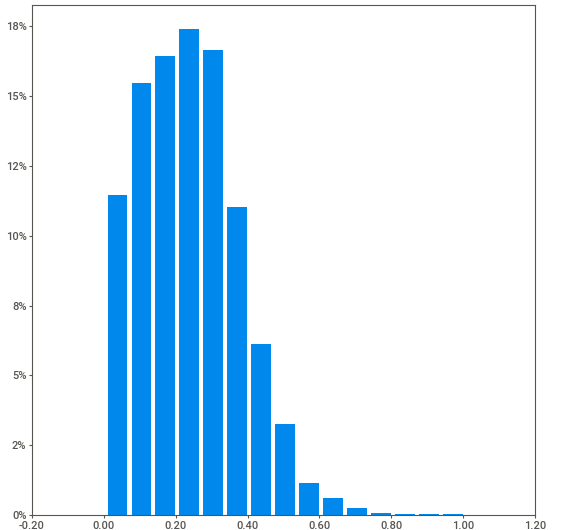
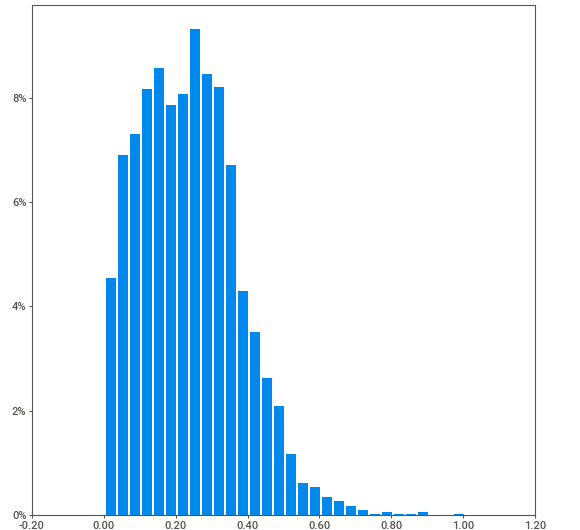
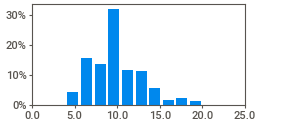
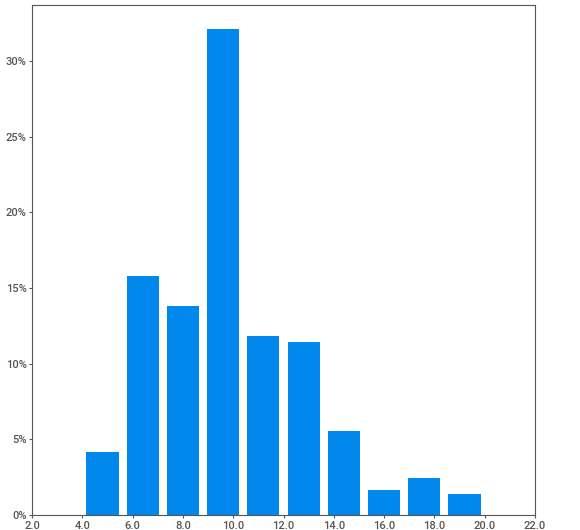
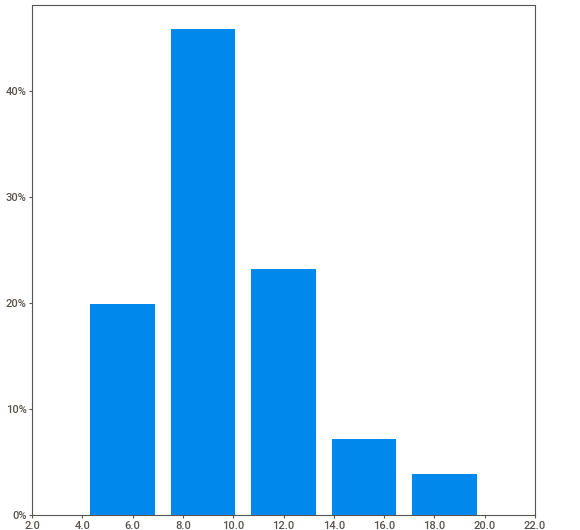
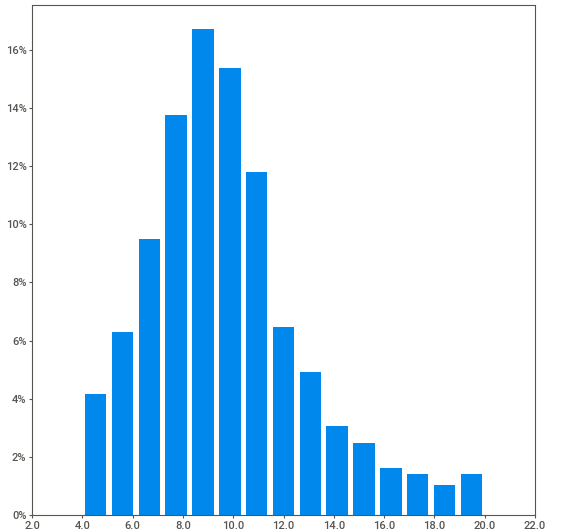
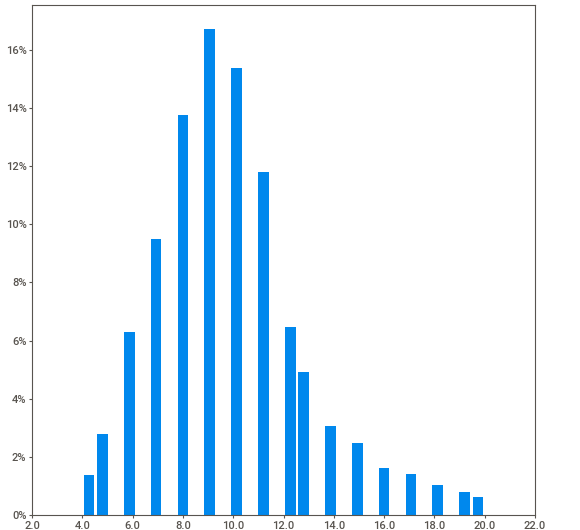
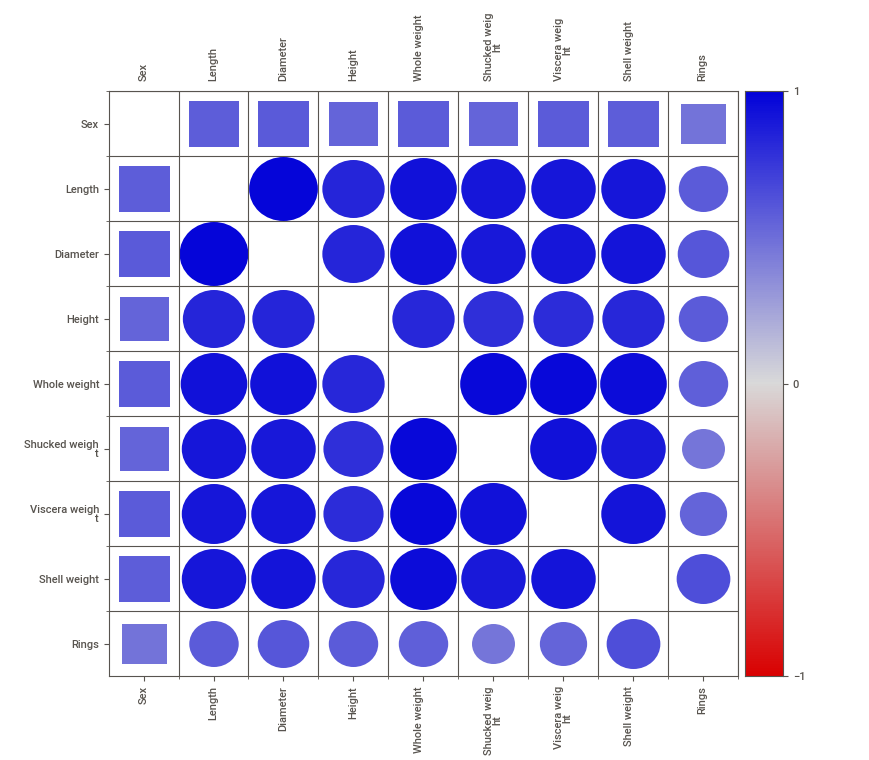
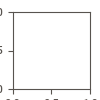

In [21]:
sweetviz.analyze(filtered_df).show_notebook()

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Features와 Labels 분리
X = filtered_df.drop('Rings', axis=1)
y = filtered_df['Rings']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)

In [34]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [37]:
# 모델설정
sm = SMOTE(sampling_strategy='auto')

# train 데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled == 0)))


After OverSampling, the shape of train_X: (9571, 8)
After OverSampling, the shape of train_y: (9571,) 

After OverSampling, counts of label '1': 0
After OverSampling, counts of label '0': 0


In [44]:
from sklearn.model_selection import train_test_split

# Assuming X_resampled and y_resampled are your resampled features and labels
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Assuming X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled are your resampled features and labels

# Standardize the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_resampled_scaled = scaler.transform(X_test_resampled)

# SVM model on resampled data
clf_svm_resampled = SVC(random_state=0)
clf_svm_resampled.fit(X_train_resampled_scaled, y_train_resampled)

# Predictions on resampled data
pred_svm_resampled = clf_svm_resampled.predict(X_test_resampled_scaled)

# Print the results
print("\n--- SVM Classifier (Resampled Data) ---")
print("Accuracy:", accuracy_score(y_test_resampled, pred_svm_resampled))
print("Confusion Matrix:\n", confusion_matrix(y_test_resampled, pred_svm_resampled))



--- SVM Classifier (Resampled Data) ---
Accuracy: 0.3227154046997389
Confusion Matrix:
 [[75 21  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [46 58  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8 28 39 37  7  2  0  1  0  0  0  0  0  0  0  2  0]
 [ 0 10 34 39 24  5  0  2  1  2  0  0  0  0  1  0  0]
 [ 0  4 12 15 42 34  1  5  3  2  1  3  0  0  1  0  0]
 [ 0  0  1  9 19 29  1 19  1  4  5  9  2  0  4  2  0]
 [ 0  1  9  5  7 31  3 38  5  6 10 13  3  0  4  1  2]
 [ 0  0  3  3  7 15  0 30  8  3 12 11  4  2  5  4  0]
 [ 0  0  2  2  7 15  1 28 12  1  6 10  5  4  7  6  1]
 [ 0  0  1  1  8  4  0 23  5 10 13  9  2  5  6 18  7]
 [ 0  0  1  7  2  7  3  6  3  7 29 10  2  3  4 19  6]
 [ 0  0  0  1  4  9  0 11  0  3 16 28 12  8 12  8  8]
 [ 0  0  0  0  1  0  2  4  0  4 13  8 26 13  5  7 17]
 [ 0  0  0  0  0  2  0  2  3  3  2 28  9 39 13 15  7]
 [ 0  0  0  0  3  1  0  1  2  2  9  4  5 10 35 15 20]
 [ 0  0  0  0  0  0  0  4  0  0  9  5 14  2 13 42 11]
 [ 0  0  0  0  0  0  0  0  0  4  3  0  3  2  1 

In [48]:
# LR

from sklearn.linear_model import LogisticRegression

# Logistic Regression model on resampled data
clf_lr_resampled = LogisticRegression(random_state=0)
clf_lr_resampled.fit(X_train_resampled_scaled, y_train_resampled)

# Predictions on resampled data
pred_lr_resampled = clf_lr_resampled.predict(X_test_resampled_scaled)

print("\n--- Logistic Regression Classifier (Resampled Data) ---")
print("Accuracy:", accuracy_score(y_test_resampled, pred_lr_resampled))
print("Confusion Matrix:\n", confusion_matrix(y_test_resampled, pred_lr_resampled))



--- Logistic Regression Classifier (Resampled Data) ---
Accuracy: 0.26475195822454306
Confusion Matrix:
 [[65 31  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [37 64  9  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5 27 35 44  8  1  0  1  0  0  1  0  0  0  0  0  2]
 [ 0  8 31 47 26  3  0  0  2  1  0  0  0  0  0  0  0]
 [ 0  4 13 14 50 34  0  4  0  1  1  1  0  0  0  0  1]
 [ 0  0  2  9 23 24  2 14 12  3  5  6  5  0  0  0  0]
 [ 0  1  8  7 16 30  4 27 23  5  3  5  5  0  0  1  3]
 [ 0  1  2  4 12 16  3 29 16  5  6  2  6  2  1  2  0]
 [ 0  0  4  1  8 17  1 37 10  1  1  7  7  3  0  6  4]
 [ 0  0  1  2  8  6  1 19  7 15  9  3 20  4  1 11  5]
 [ 0  0  0  3 10  4  1  7 20  5 14  9  7  3  0 22  4]
 [ 0  0  0  1  6 12  0 11 12 13  7  5 16 11  1 13 12]
 [ 0  0  1  0  1  1  0  6  6 10  8  7 20  8  0  7 25]
 [ 0  0  0  0  0  1  3  3  6  5 23 12 15  6  6 19 24]
 [ 0  0  0  0  3  0  0 10  4  7  4  3 12  7 10 16 31]
 [ 0  0  0  0  0  0  0  1 10  1  6  2 20  2  1 40 17]
 [ 0  0  0  0  0  0  0  0  4  

C:\Users\charl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# DT
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier on resampled data
clf_dt_resampled = DecisionTreeClassifier(random_state=0)
clf_dt_resampled.fit(X_train_resampled, y_train_resampled)

# Predictions on resampled data
pred_dt_resampled = clf_dt_resampled.predict(X_test_resampled)

print("\n--- Decision Tree Classifier (Resampled Data) ---")
print("Accuracy:", accuracy_score(y_test_resampled, pred_dt_resampled))
print("Confusion Matrix:\n", confusion_matrix(y_test_resampled, pred_dt_resampled))



--- Decision Tree Classifier (Resampled Data) ---
Accuracy: 0.5530026109660574
Confusion Matrix:
 [[80 10  4  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8 96  5  3  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7 11 57 26 15  3  1  1  1  0  0  0  0  0  0  2  0]
 [ 0  2 13 61 22 11  4  3  1  1  0  0  0  0  0  0  0]
 [ 1  2  4 13 41 30 10  5  7  5  2  1  0  0  2  0  0]
 [ 0  0  3  8 11 15 15 15 13  3  5  3  3  2  5  4  0]
 [ 1  0  0 10 11 21 28 23 16 11  8  3  1  1  1  3  0]
 [ 0  0  1  3  2 16 10 35 12  8  9  3  3  3  2  0  0]
 [ 0  0  2  2  3 13  4  8 46  9  8  3  3  2  3  1  0]
 [ 0  0  1  0  2  5 10 10  6 55  7  5  2  2  3  2  2]
 [ 0  0  0  2  4  6  3  4  5  4 65  2  6  5  1  1  1]
 [ 0  0  0  1  5  4  5  2  0  4  6 75  2  5  4  5  2]
 [ 0  0  0  0  3  1  5  5  1  1  6  2 67  1  3  3  2]
 [ 0  0  0  0  0  2  3  4  2  3  2  2  4 90  5  6  0]
 [ 0  0  0  0  0  2  2  4  3  3  4  0  1  3 81  3  1]
 [ 0  0  0  0  3  0  1  3  3  2  5  3  2  3  2 71  2]
 [ 0  0  0  0  0  1  1  1  1  2  1  1

In [52]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Random Forest Classifier on resampled data
clf_rf_resampled = RandomForestClassifier(random_state=0)
clf_rf_resampled.fit(X_train_resampled, y_train_resampled)

# Predictions on resampled data
pred_rf_resampled = clf_rf_resampled.predict(X_test_resampled)

print("\n--- Random Forest Classifier (Resampled Data) ---")
print("Accuracy:", accuracy_score(y_test_resampled, pred_rf_resampled))
print("Confusion Matrix:\n", confusion_matrix(y_test_resampled, pred_rf_resampled))


--- Random Forest Classifier (Resampled Data) ---
Accuracy: 0.6981723237597911
Confusion Matrix:
 [[ 90   3   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8 104   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8  11  80  18   1   0   0   0   3   0   0   1   0   0   2   0   0]
 [  0   3  22  72  10   8   0   0   1   0   1   0   1   0   0   0   0]
 [  0   4   3  14  56  30   5   4   3   1   1   1   0   0   1   0   0]
 [  0   0   1   7  13  25  13  15  14   2   6   3   0   1   3   2   0]
 [  1   0   0   7  13  22  24  23  15   6   8   9   2   0   4   3   1]
 [  0   0   1   2   3  11   7  49   8  10   4   4   1   3   3   1   0]
 [  0   0   0   1   1   7   4  10  71   3   0   2   2   1   3   2   0]
 [  0   0   0   1   2   1   3   2   2  91   4   1   2   2   0   0   1]
 [  0   0   0   1   1   1   3   3   4   2  83   1   1   2   2   4   1]
 [  0   0   0   0   1   0   1   1   2   2   3 102   1   1   2   0   4]
 [  0   0   0   0   0   2   0   1   0   1   2   2